## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [2]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [3]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [4]:
# load the data
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

print(happiness.head())
print(countries.head())

       country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region  
0                          South Asia  
1          Central and Eastern Europe  
2        Middle East and North Africa  
3   

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [5]:

country_features=pd.merge(countries,happiness.assign(country=happiness['country'].str.lower()), left_on='country_name', right_on='country')
country_features.head()
#on peut aussi utiliser la fonction join de pandas pour faire la jointure entre les deux dataframes (et ducou ya plus le problème des majustules, parce que ca colle les deux dataframes sur les index)

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,647500,31056997,"36,0",afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,28748,3581655,"86,5",albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,2381740,32930091,"70,0",algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,2766890,39921833,"97,1",argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,29800,2976372,"98,6",armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [6]:
# Sort by hapinness
country_features.sort_values(by='happiness_score', ascending=False, inplace=True)
country_features.head(10)

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
38,finland,338145,5231372,"100,0",finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe
31,denmark,43094,5450661,"100,0",denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe
115,switzerland,41290,7523934,"99,0",switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe
50,iceland,103000,299388,"99,9",iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe
92,norway,323802,4610820,"100,0",norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe
87,netherlands,41526,16491461,"99,0",netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe
114,sweden,449964,9016596,"99,0",sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe
88,new zealand,268680,4076140,"99,0",new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ
6,austria,83870,8192880,"98,0",austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe
72,luxembourg,2586,474413,"100,0",luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# Calculate average happiness score and number of countries for each world region
region_happiness = country_features.groupby('world_region').agg(
    average_happiness_score=('happiness_score', 'mean'),
    number_of_countries=('country_name', 'count')
).sort_values(by='average_happiness_score', ascending=False)

print(region_happiness)


                                    average_happiness_score  \
world_region                                                  
North America and ANZ                              7.173525   
Western Europe                                     6.967405   
Latin America and Caribbean                        5.971280   
Central and Eastern Europe                         5.891393   
Southeast Asia                                     5.517788   
East Asia                                          5.483633   
Commonwealth of Independent States                 5.358342   
Middle East and North Africa                       5.269306   
Sub-Saharan Africa                                 4.393856   
South Asia                                         4.355083   

                                    number_of_countries  
world_region                                             
North America and ANZ                                 4  
Western Europe                                       20  
Latin Ameri

The first region has only a few countries! What are them and what is their score?

In [21]:
# Print the countries of the first average world happiest region
happiest_region = region_happiness.index[0]
happiest_countries = country_features[country_features['world_region'] == happiest_region][['country_name', 'happiness_score']]
print(happiest_countries)

      country_name  happiness_score
88     new zealand           7.2996
21          canada           7.2321
5        australia           7.2228
127  united states           6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [36]:
# Filter countries with 100% literacy
countries_lit_100 = country_features[country_features['literacy'] == '100,0']

# Print the names in the specified format
for index, row in countries_lit_100.iterrows():
    print(f"{row['world_region']} - {row['country_name']} ({row['happiness_score']})")

#Partie pour comprendre ce qu'est iterrows
  #[index,row]=next(countries_lit_100.iterrows())
  #print(index)
  #print(row)

Western Europe - finland (7.808700085)
Western Europe - denmark (7.645599842)
Western Europe - norway (7.487999916000001)
Western Europe - luxembourg (7.237500191)
North America and ANZ - australia (7.222799778)


What is the global average?

In [37]:
# Convert literacy column to float
country_features['literacy'] = country_features['literacy'].str.replace(',', '.').astype(float)

# Calculate the global average literacy rate
global_literacy_average = country_features['literacy'].mean()
print(f"Global average literacy rate: {global_literacy_average:.2f}%")

Global average literacy rate: 81.85%


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [41]:
per_country_literacy_u50=len(country_features[country_features['literacy']<50])/len(country_features)*100
print(f"Proporition of countries with a literacy rate under 50%: {per_country_literacy_u50:.2f}%")

Proporition of countries with a literacy rate under 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [48]:
# Calculate the total world population
total_world_population = country_features['population'].sum()

# Calculate the total illiterate population
country_features['illiterate_population'] = country_features.apply(lambda x: x['population'] * (100-x['literacy']) / 100, axis=1)
illiterate_population = country_features['illiterate_population'].sum()

# Calculate the percentage of the world population that is illiterate
illiterate_population_percentage = (illiterate_population / total_world_population) * 100

# Print the results
print(f"Total world population: {total_world_population}")
print(f"Raw number of illiterate population: {illiterate_population}")
print(f"Percentage of world population that is illiterate: {illiterate_population_percentage:.2f}%")


Total world population: 6145475101
Raw number of illiterate population: 1249372988.1029997
Percentage of world population that is illiterate: 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [51]:
#Calculate the population density for each country
country_features['population_density'] = country_features['population'] / country_features['area']
print(country_features[['country_name', 'population_density']].head())

    country_name  population_density
38       finland           15.470795
31       denmark          126.483060
115  switzerland          182.221700
50       iceland            2.906680
92        norway           14.239628


What is the happiness score of the 3 countries with the lowest population density?

In [50]:
# Happines of the 3 most densly populated countries
top3_dense = country_features.sort_values(by='population_density', ascending=False).head(3)
print(top3_dense[['country_name', 'population_density', 'happiness_score']])

    country_name  population_density  happiness_score
107    singapore         6482.178932           6.3771
78         malta         1266.500000           6.7728
8        bahrain         1050.503759           6.2273


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<Axes: title={'center': 'Happiness vs Healthy life expectancy'}, xlabel='happiness_score', ylabel='healthy_life_expectancy'>

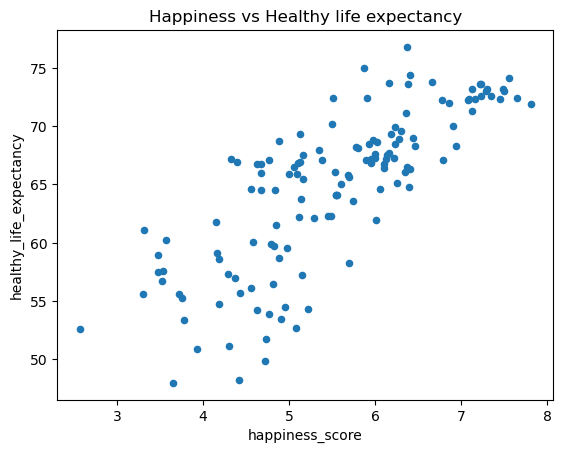

In [53]:
# Plot a scatter plot of happiness_score vs healthy life expectancy
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy', title='Happiness vs Healthy life expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.